In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import os
import seaborn as sns

In [72]:
os.chdir("/Users/sunchao/Desktop/Guo/")

## read train and test data

In [73]:
train_data = pd.read_csv("./X_train.csv", header=0)
feature_columns = ["MYCT","MMIN","MMAX","CACH","CHMIN","CHMAX"]
# remove id columns
train_data_part = train_data.iloc[:,1:]
# remove null columns
train_data_part.drop(['Unnamed: 7'],axis=1, inplace=True)

## Calculating characteristic correlation coefficient

In [74]:
r_train_features = train_data_part.corr()

In [75]:
r_train_features

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
MYCT,1.000000,-0.310754,-0.367792,-0.296612,-0.292628,-0.232332,-0.282846
MMIN,-0.310754,1.000000,0.762735,0.538803,0.565209,0.265453,0.806557
MMAX,-0.367792,0.762735,1.000000,0.531577,0.581100,0.521126,0.876504
CACH,-0.296612,0.538803,0.531577,1.000000,0.580094,0.466510,0.638237
CHMIN,-0.292628,0.565209,0.581100,0.580094,1.000000,0.510953,0.620618
CHMAX,-0.232332,0.265453,0.521126,0.466510,0.510953,1.000000,0.602654
PRP,-0.282846,0.806557,0.876504,0.638237,0.620618,0.602654,1.000000


/Users/sunchao/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


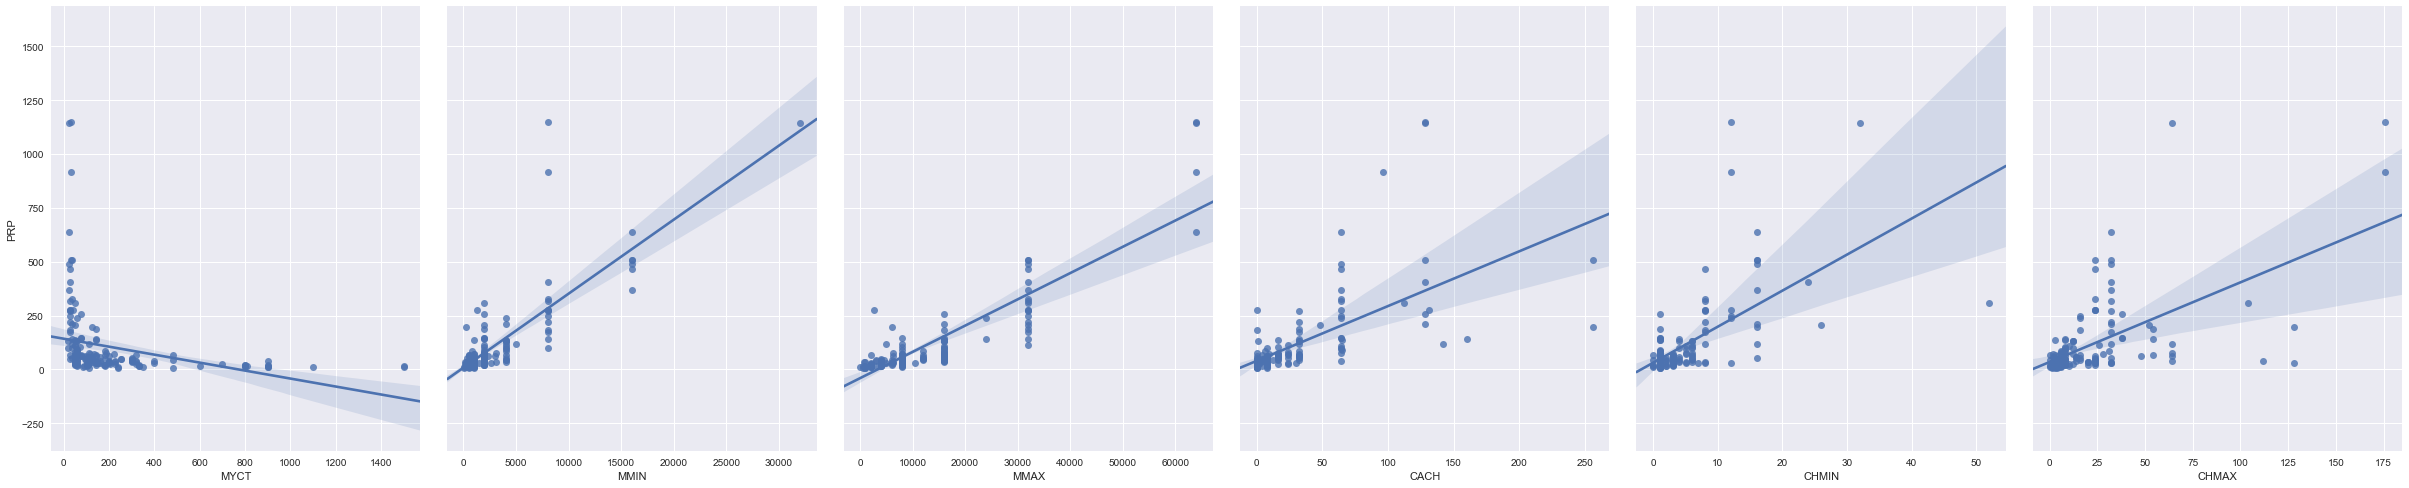

In [76]:
#通过seaborn添加一条最佳拟合直线和95%的置信带，直观判断相关关系
sns.pairplot(train_data_part, x_vars=feature_columns,
             y_vars='PRP', size=7, aspect=0.8, kind='reg')  
plt.show()

## train model

自变量---源数据: (168, 6) ；  训练集: (151, 6) ；  验证集: (17, 6)
因变量---源数据: (168,) ；  训练集: (151,) ；  验证集: (17,)
拟合参数:截距 -64.92557449243712 ,回归系数： [ 0.05929456  0.01586814  0.00558337  0.64538537 -0.52701897  1.74119668]
最佳拟合线: Y =  -64.93 + 0.06 * X1 +  0.02 * X2 + 0.01 * X3 +  0.65 * X4 +  -0.53 * X5 +  1.74 * X6


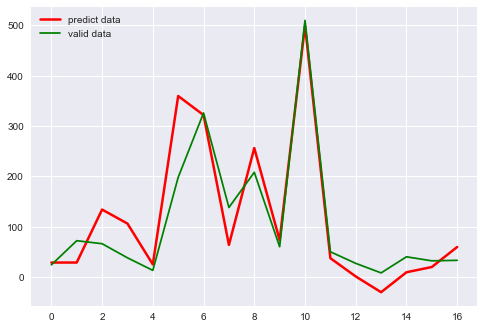

In [131]:
# split the train data of train-data and validation-data
X_train,X_val,Y_train,Y_val = train_test_split(train_data_part[feature_columns],train_data_part.PRP,train_size=0.9)

print("自变量---源数据:",train_data_part[feature_columns].shape, "；  训练集:",X_train.shape, "；  验证集:",X_val.shape)
print("因变量---源数据:",train_data_part.PRP.shape, "；  训练集:",Y_train.shape, "；  验证集:",Y_val.shape)

#调用线性规划包
model = LinearRegression()
model.fit(X_train,Y_train)#线性回归训练
a = model.intercept_#截距
b = model.coef_#回归系数
print("拟合参数:截距",a,",回归系数：",b)
 
#显示线性方程，并限制参数的小数位为两位
print("最佳拟合线: Y = ",round(a,2),"+",round(b[0],2),"* X1 + ",round(b[1],2),"* X2 "
     "+",round(b[2],2),"* X3 + ", round(b[3],2),"* X4 + ", round(b[4],2),"* X5 + ",round(b[5],2),"* X6")
 
Y_pred = model.predict(X_val)#对测试集数据，用predict函数预测
 
plt.plot(range(len(Y_pred)),Y_pred,'red', linewidth=2.5,label="predict data")
plt.plot(range(len(Y_val)),Y_val,'green',label="valid data")
plt.legend(loc=2)
plt.show()#显示预测值与测试值曲线

## use model to predict the regression value of test data

In [132]:
test_data = pd.read_csv("./X_test.csv")[feature_columns]
Y_test = model.predict(test_data)
Y_test = [int(item) for item in Y_test]

## 将预测值添加到X-test中去

In [133]:
test_data['PRP'] = Y_test

In [134]:
upload_data = test_data[['PRP']]

In [130]:
upload_data.to_csv("./Y-test.csv")